<a href="https://colab.research.google.com/github/siddhant-parmar/CMPE_255_Group_4/blob/main/Restaurant_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART 1: EDA and Data Cleaning.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import os.path

**Initial EDA and Cleaning.**

This part will run the initial cleaning and exploratory analysis and generate the following files - Plots for various analyses (png), Final cleaned data files (csv)

In [ ]:
yelp_business_df = pd.read_csv("/content/drive/My Drive/converted_data/yelp_academic_dataset_business.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   attributes.BYOB                        3519 non-null    object 
 1   attributes.AcceptsInsurance            7168 non-null    object 
 2   attributes.DriveThru                   6038 non-null    object 
 3   state                                  160585 non-null  object 
 4   attributes.HasTV                       44495 non-null   object 
 5   attributes.DietaryRestrictions         68 non-null      object 
 6   attributes.RestaurantsCounterService   40 non-null      object 
 7   attributes.Ambience                    43882 non-null   object 
 8   postal_code                            160475 non-null  object 
 9   address                                153859 non-null  object 
 10  attributes.WheelchairAccessible        29370 non-null   

We will explore the following features for our project -

- Stars
- Is Open
- State and City
- Review Count
- Name
- Postal Code
- Categories
- Latitude/Longitude
- Address

## 1. Stars

In [ ]:
yelp_business_df.stars.value_counts()

4.0    34056
3.5    28835
4.5    28072
3.0    21583
5.0    19953
2.5    13720
2.0     8523
1.5     4157
1.0     1686
Name: stars, dtype: int64

In [ ]:
yelp_business_df.stars = yelp_business_df['stars'].astype('category')

In [ ]:
yelp_business_df.stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

## 2. Open or Closed Businesses

In [ ]:
yelp_business_df.is_open.value_counts()

1    123248
0     37337
Name: is_open, dtype: int64

In [ ]:
yelp_business_df[yelp_business_df.is_open == 0][['name','city','state']].head(15)

,name,city,state
9,Capital City Barber Shop,Austin,TX
14,Uncle Sam's Pawn Shop,Columbus,OH
17,Saratoga Resort Villas,Kissimmee,FL
20,Jasmine Nail Spa,Portland,OR
21,Tire Town Auto Service,Vancouver,BC
22,Cascade Restaurant,Orlando,FL
25,Wolf Camera and Image,Atlanta,GA
35,Espresso Minute,Boston,MA
38,El Pollo Rey,Austin,TX
44,Sam's Club,Fern Park,FL


Validated that these business listings are closed. e.g. https://www.yelp.com/biz/cks-bbq-and-catering-henderson?osq=CK%27S+BBQ+%26+Catering Only working with open businesses in this study.

In [ ]:
yelp_business_df = yelp_business_df[yelp_business_df.is_open == 1]

## 3. State and City

In [ ]:
yelp_business_df.state.value_counts()

MA     27353
OR     18806
TX     18500
FL     17916
GA     13824
BC     12734
OH      9072
WA      2575
CO      2431
CA        12
NH         4
VA         2
ON         2
NY         2
KY         1
NC         1
OK         1
AZ         1
ME         1
WY         1
KS         1
MI         1
HI         1
MN         1
DC         1
NM         1
DE         1
WI         1
ABE        1
Name: state, dtype: int64

In [ ]:
print("Number of Unique States: " + str(len(yelp_business_df.state.unique())))

Number of Unique States: 29


In [ ]:
yelp_business_df[yelp_business_df.state == 'CA'][['name','city', 'state']]

,name,city,state
1819,Katia Photography,Portland,CA
47726,Here We Grow,Atlanta,CA
70731,Disney Carribean Beach Resort,Orlando,CA
71354,Vain Spa,Irvine,CA
95203,Diosa Dreads,Portland,CA
103921,Kristen Beccia Photography,Austin,CA
128258,San Jose Jazz Summer Fesitval,San Jose,CA
130618,"New Albany Elite Dental - Andrew E. Skasko, DDS",New Albany,CA
144056,Samuel Rivera Photography,Orlando,CA
148696,DMA Academy,Vancouver,CA


A lot of invalid data, for example Austin is in Texas, but shown here in California. Another example is that Vancouver is shown in California, USA instead of British Columbia, Canada.

Also there are a lot of invalid states like 'ABE'.

For this project, we are considering cities and states situated in USA only.

### 3.1 Problem 1: Invalid States

In [ ]:
USA_states = pd.read_csv('/content/drive/My Drive/converted_data/state_table.csv')

In [ ]:
USA_states.head() # https://statetable.com/

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1.0,Ala.,IV,3.0,South,6.0,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2.0,Alaska,X,4.0,West,9.0,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4.0,Ariz.,IX,4.0,West,8.0,Mountain,9
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5.0,Ark.,VI,3.0,South,7.0,West South Central,8
4,5,California,CA,USA,state,10,current,occupied,NaN,6.0,Calif.,IX,4.0,West,9.0,Pacific,9


In [ ]:
USA_states = USA_states[['name','abbreviation','country','census_region','census_division']]

In [ ]:
USA_states = USA_states.rename(index=str, columns={"name" : "State_Name", "abbreviation" : "State_Abb"})

In [ ]:
USA_states.head(60)

,State_Name,State_Abb,country,census_region,census_division
0,Alabama,AL,USA,3.0,6.0
1,Alaska,AK,USA,4.0,9.0
2,Arizona,AZ,USA,4.0,8.0
3,Arkansas,AR,USA,3.0,7.0
4,California,CA,USA,4.0,9.0
5,Colorado,CO,USA,4.0,8.0
6,Connecticut,CT,USA,1.0,1.0
7,Delaware,DE,USA,3.0,5.0
8,Florida,FL,USA,3.0,5.0
9,Georgia,GA,USA,3.0,5.0


In [ ]:
yelp_business_df = pd.merge(yelp_business_df, USA_states, left_on='state', right_on='State_Abb', how='left')

In [ ]:
yelp_business_df.head(3)

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Name,State_Abb,country,census_region,census_division
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 Pearl St,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,Boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"Gastropubs, Food, Beer Gardens, Restaurants, B...",86,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Oskar Blues Taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,Colorado,CO,USA,4.0,8.0
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 NE Airport Way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,Portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",126,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Flying Elephants at PDX,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,Oregon,OR,USA,4.0,9.0
2,NaN,NaN,NaN,OR,NaN,NaN,NaN,NaN,97214,4720 Hawthorne Ave,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,11:0-18:0,11:0-18:0,NaN,11:0-18:0,NaN,NaN,NaN,11:0-18:0,Portland,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,45.511907,NaN,NaN,NaN,NaN,False,bvN78flM8NLprQ1a1y5dRg,4.5,NaN,-122.613693,NaN,"{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",NaN,NaN,"Antiques, Fashion, Used, Vintage & Consignment...",13,NaN,2,False,NaN,NaN,NaN,The Reclaimory,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",NaN,NaN,NaN,NaN,Oregon,OR,USA,4.0,9.0


In [ ]:
yelp_business_df[yelp_business_df.State_Abb.isna()][['address','city', 'state']]

,address,city,state
99193,1698 Robson Street,Vancouver,ABE


This business are have an invalid state, hence we will drop these rows. For this project we will only consider states from USA and remove those from Canada.

In [ ]:
yelp_business_df.country.value_counts()

USA       110511
Canada     12736
Name: country, dtype: int64

In [ ]:
yelp_business_df = yelp_business_df[yelp_business_df.country == 'USA']

In [ ]:
yelp_business_df = yelp_business_df.drop(['State_Name','country'], axis=1)

In [ ]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110511 entries, 0 to 123247
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   attributes.BYOB                        3062 non-null    object  
 1   attributes.AcceptsInsurance            6346 non-null    object  
 2   attributes.DriveThru                   5010 non-null    object  
 3   state                                  110511 non-null  object  
 4   attributes.HasTV                       25183 non-null   object  
 5   attributes.DietaryRestrictions         33 non-null      object  
 6   attributes.RestaurantsCounterService   27 non-null      object  
 7   attributes.Ambience                    24600 non-null   object  
 8   postal_code                            110500 non-null  object  
 9   address                                104819 non-null  object  
 10  attributes.WheelchairAccessible        22216

In [ ]:
yelp_business_df.head()

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Abb,census_region,census_division
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 Pearl St,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,Boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"Gastropubs, Food, Beer Gardens, Restaurants, B...",86,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Oskar Blues Taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,CO,4.0,8.0
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 NE Airport Way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,Portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",126,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Flying Elephants at PDX,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,OR,4.0,9.0
2,NaN,NaN,NaN,OR,NaN,NaN,NaN,NaN,97214,4720 Hawthorne Ave,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,11:0-18:0,11:0-18:0,NaN,11:0-18:0,NaN,NaN,NaN,11:0-18:0,Portland,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,45.511907,NaN,NaN,NaN,NaN,False,bvN78flM8NLprQ1a1y5dRg,4.5,NaN,-122.613693,NaN,"{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",NaN,NaN,"Antiques, Fashion, Used, Vintage & Consignment...",13,NaN,2,False,NaN,NaN,NaN,The Reclaimory,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",NaN,NaN,NaN,NaN,OR,4.0,9.0
3,NaN,NaN,NaN,FL,NaN,NaN,NaN,NaN,32763,2566 Enterprise Rd,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orange City,NaN,NaN,NaN,28.914482,NaN,True,NaN,NaN,NaN,oaepsyvc0J17qwi8cfrOWg,3.0,NaN,-81.295979,NaN,NaN,NaN,NaN,"Beauty & Spas, Hair Salons",8,NaN,1,False,NaN,NaN,NaN,Great Clips,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",NaN,NaN,NaN,NaN,FL,3.0,5.0
4,NaN,NaN,NaN,GA,NaN,NaN,NaN,NaN,30316,1046 Memorial Dr SE,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,9:0-11:0,NaN,NaN,16:0-19:0,16:0-19:0,NaN,NaN,16:0-19:0,Atlanta,"{'garage': False, 'street': False, 'validated'...",NaN,16:0-19:0,33.747027,16:0-19:0,False,NaN,NaN,NaN,PE9uqAjdw0E4-8mjGl3wVA,4.0,NaN,-84.353424,NaN,"{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...",NaN,NaN,"Gyms, Active Life, Interval Training Gyms, Fit...",14,NaN,NaN,NaN,

### 3.2 Problem 2: Wrong City/State combination

In [ ]:
uscities = pd.read_csv('/content/drive/My Drive/converted_data/uscities.csv')

In [ ]:
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [ ]:
uscities.city = uscities.city.str.lower()

In [ ]:
uscities = uscities.drop(['city_ascii','county_fips','lat','lng','source','incorporated','timezone','id'], axis=1)

In [ ]:
yelp_business_df[['city','state']].head()

,city,state
0,Boulder,CO
1,Portland,OR
2,Portland,OR
3,Orange City,FL
4,Atlanta,GA


In [ ]:
yelp_business_df.city = yelp_business_df.city.str.lower()

In [ ]:
yelp_business_df = pd.merge(yelp_business_df, uscities, left_on=['city','state'], right_on=['city','state_id'], how='left')

In [ ]:
yelp_business_df[yelp_business_df.state_id.isna()][['city','state']].head()

,city,state
22,needham,MA
25,jamaica plain,MA
34,brookline,MA
40,allston,MA
56,swampscott,MA


In [ ]:
yelp_business_df[yelp_business_df.state == 'CA'][['city','state_id','state']]

,city,state_id,state
1285,portland,NaN,CA
32927,atlanta,NaN,CA
48709,orlando,NaN,CA
49148,irvine,CA,CA
65543,portland,NaN,CA
71502,austin,NaN,CA
88253,san jose,CA,CA
89888,new albany,NaN,CA
99163,orlando,NaN,CA
102371,vancouver,NaN,CA


There are some obvious errors like marking Austin in CA or marking Vancouver as in CA. Instead of going into fixing the errors, we will drop these very few rows for now.

In [ ]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.state_id)]

In [ ]:
yelp_business_df = yelp_business_df.drop(['state_id'], axis=1)

In [ ]:
yelp_business_df.city.isnull().value_counts()

False    97900
Name: city, dtype: int64

In [ ]:
yelp_business_df.state.isnull().value_counts()

False    97900
Name: state, dtype: int64

## 4. User Reviews

In [ ]:
yelp_business_df.review_count.describe()

count    97900.000000
mean        58.695332
std        150.238462
min          5.000000
25%          8.000000
50%         18.000000
75%         48.000000
max       9185.000000
Name: review_count, dtype: float64

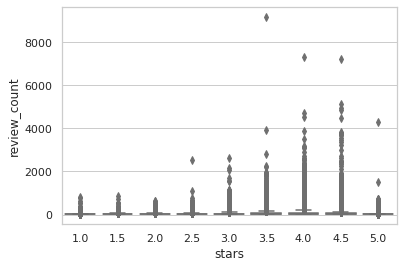

In [ ]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data = yelp_business_df)
sns_plot.figure.savefig("review-count-boxplot.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


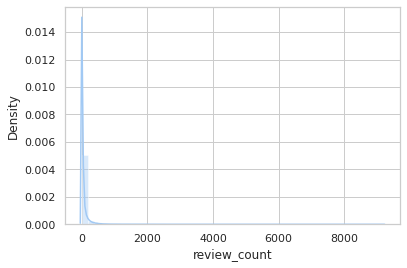

In [ ]:
sns_plot = sns.distplot(yelp_business_df.review_count)
sns_plot.figure.savefig("review-count-distplot.png")

In [ ]:
yelp_business_df.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      48.0000
0.9000     135.0000
0.9500     243.0000
0.9900     629.0000
0.9990    1698.1010
0.9999    4020.9047
Name: review_count, dtype: float64

In [ ]:
yelp_business_df.review_count.skew()

13.372157369457524

There's heavy positive skew in the review_count feature, lets see if this valid data or not.

In [ ]:
yelp_business_df.sort_values(by=['review_count'], ascending=False).iloc[0]

attributes.BYOB                                                              NaN
attributes.AcceptsInsurance                                                  NaN
attributes.DriveThru                                                         NaN
state                                                                         OR
attributes.HasTV                                                             NaN
                                                     ...                        
population                                                           2.07478e+06
density                                                                     1894
military                                                                   False
ranking                                                                        1
zips                           97227 97221 97220 97229 97203 97202 97201 9720...
Name: 44145, Length: 70, dtype: object

Manually validated from yelp the top few businesses and their corresponding review counts. Looks good. Lets see if we can transform the feature to make it more gaussian and better distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


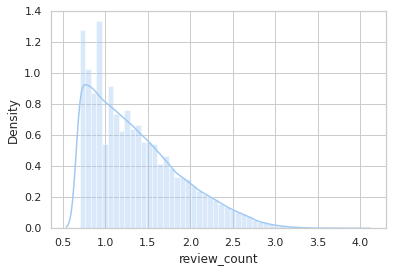

In [ ]:
sns_plot = sns.distplot(np.log10(yelp_business_df.review_count))
sns_plot.figure.savefig("log-review-count-distplot.png")

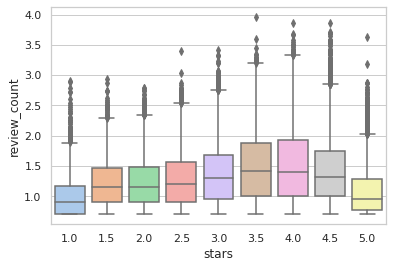

In [ ]:
sns_plot = sns.boxplot(x = yelp_business_df.stars, y=np.log10(yelp_business_df.review_count))
sns_plot.figure.savefig("log-review-count-boxplot.png")

As we see above, there are usually lesser number of reviews for very low and very high ratings. The inter-quartile range is similar for each of them which implies people generally have concensus on a business' star ratings. The more common star ratings, i.e. 3-4.5 have higher median number of review counts. 

In [ ]:
np.log10(yelp_business_df.review_count).skew()

0.848677940357736

Log10 transform of review counts looks like a good valid feature to have. Keeping the transform. Making sure correlation with 'stars' remains unaffected before doing the transform.

In [ ]:
yelp_business_df.stars.corr(yelp_business_df.review_count)

0.03004192363857404

In [ ]:
yelp_business_df.stars.corr(np.log10(yelp_business_df.review_count))

-0.00012420718842806884

In [ ]:
yelp_business_df.review_count = np.log10(yelp_business_df.review_count)

In [ ]:
yelp_business_df.review_count.isnull().value_counts()

False    97900
Name: review_count, dtype: int64

### 5. Name Feature

In [ ]:
yelp_business_df.name.head()

0        Oskar Blues Taproom
1    Flying Elephants at PDX
2             The Reclaimory
3                Great Clips
4          Crossfit Terminus
Name: name, dtype: object

In [ ]:
yelp_business_df.name.isnull().value_counts()

False    97900
Name: name, dtype: int64

In [ ]:
yelp_business_df.name = yelp_business_df.name.str.lower()

## 6. Postal Code

In [ ]:
yelp_business_df.postal_code.head()

0    80302
1    97218
2    97214
3    32763
4    30316
Name: postal_code, dtype: object

In [ ]:
yelp_business_df.postal_code.isnull().value_counts()

False    97889
True        11
Name: postal_code, dtype: int64

In [ ]:
yelp_business_df[yelp_business_df.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
7974,davidson mesa scenic overlook,Denver-Boulder Turnpike Hwy 36 Westbound,boulder,CO
22381,austin tree pros,NaN,austin,TX
49905,central ohio appliance repair,NaN,columbus,OH
52430,convelabs,NaN,orlando,FL
54571,choice home warranty,NaN,austin,TX


Checked on Yelp, looks like the businesses with NaN addresses actually have address missing on Yelp. e.g. https://www.yelp.com/biz/xtreme-cleaning-az-phoenix-2?osq=Xtreme+Cleaning+AZ

In [ ]:
yelp_business_df[pd.notnull(yelp_business_df.address) & yelp_business_df.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
7974,davidson mesa scenic overlook,Denver-Boulder Turnpike Hwy 36 Westbound,boulder,CO


Even the rows where address is not NaN, there are postal_code missing for these listings on Yelp. e.g. https://www.yelp.com/biz/monroe-street-farmers-market-madison?osq=Monroe+Street+Farmer%27s+Market. Replacing all NaN values with 'NOT_AVAILABLE'

In [ ]:
yelp_business_df.postal_code = yelp_business_df.postal_code.fillna('NOT_AVAILABLE')

In [ ]:
yelp_business_df.postal_code = yelp_business_df.postal_code.str.lower()

In [ ]:
yelp_business_df.postal_code.isnull().value_counts()

False    97900
Name: postal_code, dtype: int64

## 7. Categories

In [ ]:
yelp_business_df.categories.head()

0    Gastropubs, Food, Beer Gardens, Restaurants, B...
1    Salad, Soup, Sandwiches, Delis, Restaurants, C...
2    Antiques, Fashion, Used, Vintage & Consignment...
3                           Beauty & Spas, Hair Salons
4    Gyms, Active Life, Interval Training Gyms, Fit...
Name: categories, dtype: object

In [ ]:
yelp_business_df.categories.isnull().value_counts()

False    97820
True        80
Name: categories, dtype: int64

In [ ]:
yelp_business_df[yelp_business_df.categories.isnull()][['name','city','state']].head()

,name,city,state
564,aaa cooper transportation,pflugerville,TX
1799,value dry of massachusetts,boston,MA
3046,mail house plus,portland,OR
3266,praxair distribution,austin,TX
3654,absolute oil company,peabody,MA


In [ ]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.categories)]

In [ ]:
yelp_business_df.categories = yelp_business_df.categories.str.lower()

In [ ]:
yelp_business_df.categories.str.contains('restaurant|food').value_counts()

False    66044
True     31776
Name: categories, dtype: int64

Keeping only food/restaurant related listings for our study.

In [ ]:
yelp_business_df = yelp_business_df[yelp_business_df.categories.str.contains('restaurant|food')]

## 8. Longitudes and Latitudes

In [ ]:
yelp_business_df.latitude.isnull().value_counts()

False    31776
Name: latitude, dtype: int64

In [ ]:
yelp_business_df.longitude.isnull().value_counts()

False    31776
Name: longitude, dtype: int64

In [ ]:
yelp_business_df[yelp_business_df.longitude.isnull()]['latitude']

Series([], Name: latitude, dtype: float64)

In [ ]:
yelp_business_df[yelp_business_df.latitude.isnull()]['longitude']

Series([], Name: longitude, dtype: float64)

In [ ]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.latitude) & pd.notnull(yelp_business_df.longitude)]

In [ ]:
yelp_business_df[['latitude','longitude']].describe()

,latitude,longitude
count,31776.000000,31776.000000
mean,36.815213,-91.111962
std,6.561637,17.530523
min,28.136102,-123.124627
25%,30.247626,-97.792184
50%,39.851498,-84.218776
75%,42.384192,-81.364596
max,49.155176,-70.868355


Got the bounding box i.e. max/min lat longs for continental United States from here - https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States

In [ ]:
top = 49.3457868 # north latitude
left = -124.7844079 # west longitude
right = -66.9513812 # east longitude
bottom =  24.7433195 # south latitude

In [ ]:
yelp_business_df[(yelp_business_df.latitude > top) | (yelp_business_df.latitude < bottom) | (yelp_business_df.longitude > right) | (yelp_business_df.longitude < left)][['name','city','state']]

,name,city,state


There are 0 business who's latitude/longitude fall outside the bounding box of continental USA. Dropping them

In [ ]:
# Reomve this code (no need)
yelp_business_df = yelp_business_df[(yelp_business_df.latitude <= top) & (yelp_business_df.latitude >= bottom) & (yelp_business_df.longitude<=right) & (yelp_business_df.longitude>=left)]

## 9. Address

In [ ]:
yelp_business_df.address.isnull().value_counts()

False    31287
True       489
Name: address, dtype: int64

In [ ]:
yelp_business_df[yelp_business_df.address.isnull()][['name','address','city','state']].head()

,name,address,city,state
476,phantom gourmet food festival,NaN,boston,MA
703,los munchies,NaN,orlando,FL
784,the north end,NaN,boston,MA
795,mrbeast burger,NaN,newton,MA
1447,roxy's gourmet grilled cheese,NaN,boston,MA


As we see a lot of the places above with null address are actually mobile restaurants, like food trucks etc. Marking all these addresses as 'NOT_AVAILABLE'.

In [ ]:
yelp_business_df.address = yelp_business_df.address.fillna('NOT_AVAILABLE')

In [ ]:
yelp_business_df.address = yelp_business_df.address.str.lower()

In [ ]:
yelp_business_df.address.isnull().value_counts()

False    31776
Name: address, dtype: int64

# Joining Data

## Joining yelp tip data with yelp business data

Get all user_ids that provided tips for this business

In [ ]:
yelp_tips_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_tip.csv')

In [ ]:
yelp_tips_df.head()

,user_id,date,compliment_count,business_id,text
0,WCjg0jdHXMlwbqS9tZUx8Q,2011-07-22 19:07:35,0,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...
1,42-Z02y9bABShAGZhuSzrQ,2014-09-10 07:33:29,0,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...
2,5u7E3LYp_3eB8dLuUBazXQ,2013-12-13 23:23:41,0,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b..."
3,wDWoMG5N9oI4DJ-p7z8EBg,2017-07-11 23:07:16,0,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are..."
4,JmuFlorjjRshHTKzTwNtgg,2016-11-30 08:46:36,0,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E..."


In [ ]:
yelp_business_df = yelp_business_df.merge(yelp_tips_df[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [ ]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [ ]:
yelp_business_df = yelp_business_df.drop_duplicates(subset='business_id')

In [ ]:
yelp_business_df['users'] = yelp_business_df[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yelp_business_df = yelp_business_df.drop(['user_id',0], axis=1)

## Joining yelp review data with yelp business data

Get all user_ids that provided reviews for this business

In [ ]:
yelp_reviews_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_review.csv')

In [ ]:
yelp_reviews_df.head()

,cool,user_id,review_id,text,date,business_id,stars,funny,useful
0,1,ak0TdVmGKo4pwqdJSTLwWw,lWC-xP3rd6obsecCYsGZRg,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,buF9druCkbuXLX526sGELQ,4.0,1,3
1,0,YoVfDbnISlW0f7abNQACIg,8bFej1QE5LXp4O05qjGqXA,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,RA4V8pr014UyUbDvI-LW2A,4.0,0,1
2,0,eC5evKn1TWDyHCyQAwguUw,NDhkzczKjLshODbqDoNLSg,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0
3,1,SFQ1jcnGguO0LYWnbbftAA,T5fAqjjFooT4V0OeZyuk1w,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1
4,0,0kA0PAJ8QFMeveQWHFqz2A,sjm_uUcQVxab_EeLCqsYLg,The food is always great here. The service fro...,2011-07-28 18:05:01,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0


In [ ]:
yelp_business_df = yelp_business_df.merge(yelp_reviews_df[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [ ]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [ ]:
yelp_business_df = yelp_business_df.drop_duplicates(subset='business_id')

In [ ]:
yelp_business_df['users2'] = yelp_business_df[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yelp_business_df = yelp_business_df.drop(['user_id',0], axis=1)

In [ ]:
yelp_business_df = yelp_business_df.reset_index(drop=True)

## Union of all users interacting with this business

In [ ]:
def union(x):
    a = x['users']
    b = x['users2']
    return list(set(a) | set(b))

In [ ]:
yelp_business_df.users = yelp_business_df.apply(union, axis=1)

In [ ]:
yelp_business_df = yelp_business_df.drop(['users2'], axis=1)

## Joining yelp user profiles data with yelp business data

In [ ]:
yelp_users_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_user.csv')

In [ ]:
yelp_users_df.head()

,elite,user_id,compliment_note,compliment_more,compliment_hot,compliment_list,compliment_cool,cool,compliment_photos,fans,compliment_funny,compliment_writer,average_stars,compliment_profile,funny,review_count,name,compliment_plain,compliment_cute,friends,yelping_since,useful
0,"2006,2007,2008,2009,2010,2011,2012,2013,2014",q_QQ5kBBwlCcbL1s4NVK3g,1212,163,1710,147,2541,11291,323,1357,2541,815,3.85,190,10030,1220,Jane,5691,361,"xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",2005-03-14 20:26:35,15038
1,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",dIIKEfOgo0KqUfGQvGikPg,1187,87,1632,96,2205,18046,294,1025,2205,472,4.09,94,10289,2136,Gabi,3293,232,"XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",2007-08-10 19:01:51,21272
2,"2010,2011",D6ErcUnFALnCQN4b1W_TlA,5,1,22,0,31,130,1,16,31,3,3.76,3,128,119,Jason,20,0,"GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",2007-02-07 15:47:53,188
3,"2009,2010,2011,2012,2013,2014",JnPIjvC0cmooNDfsa9BmXg,1120,129,1180,90,1566,4035,326,420,1566,391,3.77,93,4722,987,Kat,4510,219,"HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",2009-02-09 16:14:29,7234
4,"2009,2010,2011",37Hc8hr3cw0iHLoPzLK6Ow,77,19,248,15,310,1124,44,47,310,98,3.72,32,727,495,Christine,131,16,"-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",2008-03-03 04:57:05,1577


In [ ]:
yelp_users_df.yelping_since = yelp_users_df.yelping_since.astype(np.datetime64)

In [ ]:
yelp_users_df['months_since_yelping'] = ((pd.to_datetime('today') - yelp_users_df.yelping_since)/np.timedelta64(1, 'M'))

In [ ]:
yelp_users_df.columns

Index(['elite', 'user_id', 'compliment_note', 'compliment_more',
       'compliment_hot', 'compliment_list', 'compliment_cool', 'cool',
       'compliment_photos', 'fans', 'compliment_funny', 'compliment_writer',
       'average_stars', 'compliment_profile', 'funny', 'review_count', 'name',
       'compliment_plain', 'compliment_cute', 'friends', 'yelping_since',
       'useful', 'months_since_yelping'],
      dtype='object')

In [ ]:
yelp_users_df['total_compliments'] = yelp_users_df[yelp_users_df.columns[yelp_users_df.columns.to_series().str.contains('compliment')]].sum(axis=1)

In [ ]:
def get_user_stats(x):
    data = yelp_users_df[yelp_users_df.user_id.isin(x['users'])]
    result = x[['business_id']]
    result['mean_user_review_counts'] = data.review_count.mean()
    result['mean_months_since_yelping'] = data.months_since_yelping.mean()
    result['mean_user_fans'] = data.fans.mean()
    result['mean_total_compliments'] = data.total_compliments.mean()
    return result

In [ ]:
yelp_business_df.head()

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Abb,census_region,census_division,state_name,county_name,population,density,military,ranking,zips,users
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 pearl st,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"gastropubs, food, beer gardens, restaurants, b...",1.934498,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",oskar blues taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,CO,4.0,8.0,Colorado,Boulder,124345.0,1551.0,False,2.0,80310 80304 80305 80302 80303 80301 80307 8030...,"[KWfCQBcKrCaXn4tekg_xzA, vNPxlt5f50q0e2nVAScW3..."
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 ne airport way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",flying elephants at pdx,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,OR,4.0,9.0,Oregon,Multnomah,2074775.0,1894.0,False,1.0,97227 97221 97220 97229 97203 97202 97201 9720...,"[01rLtLujxiMfvZKHj1Ucyw, Ep3KDgEF3_WApurnGRi3m..."
2,NaN,NaN,NaN,OH,NaN,NaN,NaN,NaN,43206,740 s high st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8:0-14:0,8:0-14:0,NaN,NaN,NaN,NaN,NaN,NaN,columbus,NaN,NaN,NaN,39.947007,NaN,NaN,NaN,NaN,NaN,jFYIsSb7r1QeESVUnXPHBw,4.5,NaN,-82.997471,NaN,"{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",NaN,NaN,"breakfast & brunch, restaurants",1.041393,NaN,NaN,NaN,NaN,NaN,NaN,boxwood biscuit,NaN,NaN,NaN,NaN,NaN,OH,2.0,3.0,Ohio,Franklin,1562009.0,1582.0,False,1.0,43026 43109 43054 43220 43221 43222 43223 4322...,"[nan, NvHk8zOMVToGSK9cI_mv3g, 1Jua4k8nD9izG1Se..."
3,NaN,NaN,NaN,CO,NaN,NaN,NaN,NaN,80302,100 clematis dr,True,NaN,True,NaN,False,NaN,NaN,NaN,NaN,1,8:0-20:0,8:0-20:0,NaN,8:0-20:0,8:0-20:0,NaN,NaN,8:0-20:0,boulder,"{'garage': False, 'street': True, 'validated':...",NaN,8:0-20:0,39.998449,8:0-20:0,NaN,False,NaN,True,rYs_1pNB_RMtn5WQh55QDA,3.5,NaN,-105.281006,NaN,"{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ...",NaN,NaN,"food, shopping, convenience stores, souvenir s...",0.698970,NaN,NaN,NaN

In [ ]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.apply(get_user_stats, axis=1), left_on='business_id', right_on='business_id', how='left')

In [ ]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31776 entries, 0 to 31775
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   attributes.BYOB                        2745 non-null   object  
 1   attributes.AcceptsInsurance            54 non-null     object  
 2   attributes.DriveThru                   4505 non-null   object  
 3   state                                  31776 non-null  object  
 4   attributes.HasTV                       21315 non-null  object  
 5   attributes.DietaryRestrictions         31 non-null     object  
 6   attributes.RestaurantsCounterService   24 non-null     object  
 7   attributes.Ambience                    20972 non-null  object  
 8   postal_code                            31776 non-null  object  
 9   address                                31776 non-null  object  
 10  attributes.WheelchairAccessible        10421 non-null  obj

In [ ]:
yelp_business_df.head()

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Abb,census_region,census_division,state_name,county_name,population,density,military,ranking,zips,users,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 pearl st,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"gastropubs, food, beer gardens, restaurants, b...",1.934498,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",oskar blues taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,CO,4.0,8.0,Colorado,Boulder,124345.0,1551.0,False,2.0,80310 80304 80305 80302 80303 80301 80307 8030...,"[KWfCQBcKrCaXn4tekg_xzA, vNPxlt5f50q0e2nVAScW3...",52.558824,97.128415,1.970588,14.323529
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 ne airport way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",flying elephants at pdx,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,OR,4.0,9.0,Oregon,Multnomah,2074775.0,1894.0,False,1.0,97227 97221 97220 97229 97203 97202 97201 9720...,"[01rLtLujxiMfvZKHj1Ucyw, Ep3KDgEF3_WApurnGRi3m...",309.323529,124.701746,25.843137,625.107843
2,NaN,NaN,NaN,OH,NaN,NaN,NaN,NaN,43206,740 s high st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8:0-14:0,8:0-14:0,NaN,NaN,NaN,NaN,NaN,NaN,columbus,NaN,NaN,NaN,39.947007,NaN,NaN,NaN,NaN,NaN,jFYIsSb7r1QeESVUnXPHBw,4.5,NaN,-82.997471,NaN,"{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",NaN,NaN,"breakfast & brunch, restaurants",1.041393,NaN,NaN,NaN,NaN,NaN,NaN,boxwood biscuit,NaN,NaN,NaN,NaN,NaN,OH,2.0,3.0,Ohio,Franklin,1562009.0,1582.0,False,1.0,43026 43109 43054 43220 43221 43222 43223 4322...,"[nan, NvHk8zOMVToGSK9cI_mv3g, 1Jua4k8nD9izG1Se...",148.500000,51.977335,4.500000,30.000000
3,NaN,NaN,NaN,CO,NaN,NaN,NaN,NaN,80302,100 clematis dr,True,NaN,True,NaN,False,NaN,NaN,NaN,NaN,1,8:0-20:0,8:0-20:0,NaN,8:0-20:0,8:0-20:0,NaN,NaN,8:0-20:0,boulder,"{'garage': False, 'street': True, 'validated':...",NaN,8:0-20:0,39.9984

# Exporting cleaned data

In [ ]:
cleaned_cols = ['stars', 'business_id', 'name', 'city', 'state', 'postal_code', 'latitude', 'longitude',
               'categories', 'review_count', 'mean_user_review_counts', 'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']

In [ ]:
yelp_business_df.head()

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Abb,census_region,census_division,state_name,county_name,population,density,military,ranking,zips,users,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 pearl st,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"gastropubs, food, beer gardens, restaurants, b...",1.934498,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",oskar blues taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,CO,4.0,8.0,Colorado,Boulder,124345.0,1551.0,False,2.0,80310 80304 80305 80302 80303 80301 80307 8030...,"[KWfCQBcKrCaXn4tekg_xzA, vNPxlt5f50q0e2nVAScW3...",52.558824,97.128415,1.970588,14.323529
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 ne airport way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",flying elephants at pdx,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,OR,4.0,9.0,Oregon,Multnomah,2074775.0,1894.0,False,1.0,97227 97221 97220 97229 97203 97202 97201 9720...,"[01rLtLujxiMfvZKHj1Ucyw, Ep3KDgEF3_WApurnGRi3m...",309.323529,124.701746,25.843137,625.107843
2,NaN,NaN,NaN,OH,NaN,NaN,NaN,NaN,43206,740 s high st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8:0-14:0,8:0-14:0,NaN,NaN,NaN,NaN,NaN,NaN,columbus,NaN,NaN,NaN,39.947007,NaN,NaN,NaN,NaN,NaN,jFYIsSb7r1QeESVUnXPHBw,4.5,NaN,-82.997471,NaN,"{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",NaN,NaN,"breakfast & brunch, restaurants",1.041393,NaN,NaN,NaN,NaN,NaN,NaN,boxwood biscuit,NaN,NaN,NaN,NaN,NaN,OH,2.0,3.0,Ohio,Franklin,1562009.0,1582.0,False,1.0,43026 43109 43054 43220 43221 43222 43223 4322...,"[nan, NvHk8zOMVToGSK9cI_mv3g, 1Jua4k8nD9izG1Se...",148.500000,51.977335,4.500000,30.000000
3,NaN,NaN,NaN,CO,NaN,NaN,NaN,NaN,80302,100 clematis dr,True,NaN,True,NaN,False,NaN,NaN,NaN,NaN,1,8:0-20:0,8:0-20:0,NaN,8:0-20:0,8:0-20:0,NaN,NaN,8:0-20:0,boulder,"{'garage': False, 'street': True, 'validated':...",NaN,8:0-20:0,39.9984

In [ ]:
yelp_business_df[cleaned_cols].head()

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,4.0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,boulder,CO,80302,40.017544,-105.283348,"gastropubs, food, beer gardens, restaurants, b...",1.934498,52.558824,97.128415,1.970588,14.323529
1,4.0,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,portland,OR,97218,45.588906,-122.593331,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,309.323529,124.701746,25.843137,625.107843
2,4.5,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,columbus,OH,43206,39.947007,-82.997471,"breakfast & brunch, restaurants",1.041393,148.500000,51.977335,4.500000,30.000000
3,3.5,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,boulder,CO,80302,39.998449,-105.281006,"food, shopping, convenience stores, souvenir s...",0.698970,62.500000,118.457038,2.000000,0.500000
4,4.0,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,peabody,MA,01960,42.541155,-70.973438,"food, pizza, restaurants",1.591065,63.916667,113.118522,5.291667,67.416667


In [ ]:
yelp_business_df[cleaned_cols].to_csv('/content/drive/My Drive/converted_data/yelp_business_cleaned.csv', index=False)

In [ ]:
yelp_business_df.to_csv('/content/drive/My Drive/converted_data/yelp_business_cleaned_raw.csv', index=False)

# PART 2 : Feature Engineering

# Obtain Data

In [ ]:
yelp_data_cleaned = pd.read_csv('/content/drive/My Drive/converted_data/yelp_business_cleaned.csv')

In [ ]:
yelp_data_cleaned.head()

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,4.0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,boulder,CO,80302,40.017544,-105.283348,"gastropubs, food, beer gardens, restaurants, b...",1.934498,52.558824,97.128415,1.970588,14.323529
1,4.0,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,portland,OR,97218,45.588906,-122.593331,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,309.323529,124.701746,25.843137,625.107843
2,4.5,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,columbus,OH,43206,39.947007,-82.997471,"breakfast & brunch, restaurants",1.041393,148.500000,51.977335,4.500000,30.000000
3,3.5,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,boulder,CO,80302,39.998449,-105.281006,"food, shopping, convenience stores, souvenir s...",0.698970,62.500000,118.457038,2.000000,0.500000
4,4.0,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,peabody,MA,1960,42.541155,-70.973438,"food, pizza, restaurants",1.591065,63.916667,113.118522,5.291667,67.416667


In [ ]:
yelp_data_cleaned = yelp_data_cleaned.dropna()

In [ ]:
yelp_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 31774
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stars                      28647 non-null  float64
 1   business_id                28647 non-null  object 
 2   name                       28647 non-null  object 
 3   city                       28647 non-null  object 
 4   state                      28647 non-null  object 
 5   postal_code                28647 non-null  int64  
 6   latitude                   28647 non-null  float64
 7   longitude                  28647 non-null  float64
 8   categories                 28647 non-null  object 
 9   review_count               28647 non-null  float64
 10  mean_user_review_counts    28647 non-null  float64
 11  mean_months_since_yelping  28647 non-null  float64
 12  mean_user_fans             28647 non-null  float64
 13  mean_total_compliments     28647 non-null  flo

# Feature Engineering

## Clustering Latitude and Longitude to identify closeby restaurants

Using DBSCAN to cluster businesses within a 2km radius i.e. eps=2kms and parameterizing such that every point gets a cluster, no noise i.e. min_samples=1

In [ ]:
coords = yelp_data_cleaned[['latitude', 'longitude']].values

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
kms_per_radian = 6371.0088
epsilon = 2 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')

In [ ]:
labels = db.fit_predict(np.radians(coords))

In [ ]:
len(set(db.labels_))

255

In [ ]:
yelp_data_cleaned['location_cluster'] = labels

In [ ]:
yelp_data_cleaned.head()

,stars,business_id,name,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,location_cluster
0,4.0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,boulder,CO,80302,40.017544,-105.283348,"gastropubs, food, beer gardens, restaurants, b...",1.934498,52.558824,97.128415,1.970588,14.323529,0
1,4.0,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,portland,OR,97218,45.588906,-122.593331,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,309.323529,124.701746,25.843137,625.107843,1
2,4.5,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,columbus,OH,43206,39.947007,-82.997471,"breakfast & brunch, restaurants",1.041393,148.500000,51.977335,4.500000,30.000000,2
3,3.5,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,boulder,CO,80302,39.998449,-105.281006,"food, shopping, convenience stores, souvenir s...",0.698970,62.500000,118.457038,2.000000,0.500000,0
4,4.0,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,peabody,MA,1960,42.541155,-70.973438,"food, pizza, restaurants",1.591065,63.916667,113.118522,5.291667,67.416667,3


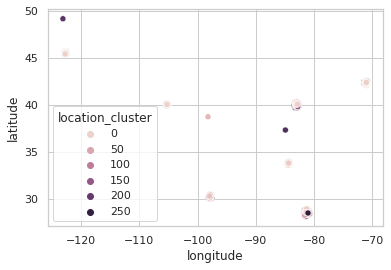

In [ ]:
sns.scatterplot(x = "longitude", y = "latitude", hue = "location_cluster", data = yelp_data_cleaned)

## Count restaurants with similar cuisines visiting that are nearby

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(analyzer='word', stop_words='english')

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
def count_similarity(a):
    sims = np.where(a>0.9)
    return len(sims[0])

In [ ]:
def get_sim_counts(temp):
    X = vect.fit_transform(temp.categories)
    cosine_sim = linear_kernel(X)
    similar_counts = np.apply_along_axis(count_similarity, 1, cosine_sim)
    return similar_counts

In [ ]:
for cluster in yelp_data_cleaned.location_cluster.unique():
    temp = yelp_data_cleaned[yelp_data_cleaned.location_cluster == cluster]
    sim_counts = get_sim_counts(temp)
    yelp_data_cleaned.loc[yelp_data_cleaned.business_id.isin(temp.business_id), 'sim_counts'] = sim_counts

In [ ]:
yelp_data_cleaned.sim_counts.describe()

count    28647.000000
mean        15.536321
std         31.738220
min          1.000000
25%          1.000000
50%          2.000000
75%         13.000000
max        230.000000
Name: sim_counts, dtype: float64

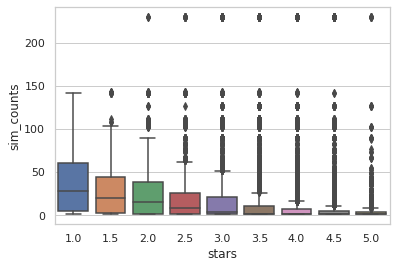

In [ ]:
sns.boxplot(x = 'stars', y = 'sim_counts', data = yelp_data_cleaned)

## Count restaurants with similar users visiting that are nearby

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
def get_user_sim_counts(temp):
    X = normalize(temp[['mean_user_review_counts', 'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']])
    cosine_sim = linear_kernel(X)
    user_sim_counts = np.apply_along_axis(count_similarity, 1, cosine_sim)
    return user_sim_counts

In [ ]:
for cluster in yelp_data_cleaned.location_cluster.unique():
    temp = yelp_data_cleaned[yelp_data_cleaned.location_cluster == cluster]
    user_sim_counts = get_user_sim_counts(temp)
    yelp_data_cleaned.loc[yelp_data_cleaned.business_id.isin(temp.business_id), 'user_sim_counts'] = user_sim_counts

In [ ]:
yelp_data_cleaned.user_sim_counts.describe()

count    28647.000000
mean      1423.146263
std        810.997311
min          1.000000
25%        967.500000
50%       1398.000000
75%       1955.000000
max       3454.000000
Name: user_sim_counts, dtype: float64

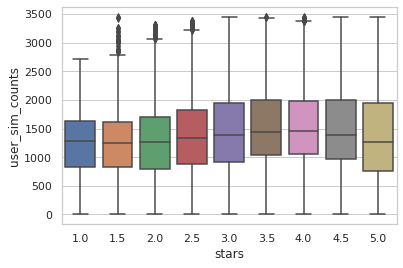

In [ ]:
sns.boxplot(x = 'stars', y = 'user_sim_counts', data = yelp_data_cleaned)

## Categorical to Dummies Transformation

In [ ]:
yelp_data_cleaned = pd.get_dummies(yelp_data_cleaned, columns=['city', 'state', 'postal_code'])

In [ ]:
yelp_data_cleaned.head()

,stars,business_id,name,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,location_cluster,sim_counts,user_sim_counts,city_alafaya,city_aloha,city_alpharetta,city_altamonte springs,city_apopka,city_arvada,city_ashville,city_atlanta,city_austell,city_austin,city_avondale estates,city_bay lake,city_beaverton,city_bee cave,city_belle isle,city_beverly,city_bexley,city_boston,city_boulder,city_braintree,city_brice,city_brockton,city_brookhaven,city_buckhead,city_buda,city_camas,...,postal_code_97212,postal_code_97213,postal_code_97214,postal_code_97215,postal_code_97216,postal_code_97217,postal_code_97218,postal_code_97219,postal_code_97220,postal_code_97221,postal_code_97222,postal_code_97223,postal_code_97224,postal_code_97225,postal_code_97227,postal_code_97229,postal_code_97230,postal_code_97231,postal_code_97232,postal_code_97233,postal_code_97236,postal_code_97239,postal_code_97253,postal_code_97255,postal_code_97258,postal_code_97266,postal_code_97267,postal_code_97381,postal_code_98607,postal_code_98660,postal_code_98661,postal_code_98662,postal_code_98663,postal_code_98664,postal_code_98665,postal_code_98682,postal_code_98683,postal_code_98684,postal_code_98685,postal_code_98686
0,4.0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,40.017544,-105.283348,"gastropubs, food, beer gardens, restaurants, b...",1.934498,52.558824,97.128415,1.970588,14.323529,0,1.0,209.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.0,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,45.588906,-122.593331,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,309.323529,124.701746,25.843137,625.107843,1,1.0,1409.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.5,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,39.947007,-82.997471,"breakfast & brunch, restaurants",1.041393,148.500000,51.977335,4.500000,30.000000,2,7.0,723.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.5,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,39.998449,-105.281006,"food, shopping, convenience stores, souvenir s...",0.698970,62.500000,118.457038,2.000000,0.500000,0,1.0,193.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,42.541155,-70.973438,"food, pizza, restaurants",1.591065,63.916667,113.118522,5.291667,67.416667,3,8.0,2025.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exporting transformed data

In [ ]:
yelp_data_cleaned.head()

,stars,business_id,name,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,location_cluster,sim_counts,user_sim_counts,city_alafaya,city_aloha,city_alpharetta,city_altamonte springs,city_apopka,city_arvada,city_ashville,city_atlanta,city_austell,city_austin,city_avondale estates,city_bay lake,city_beaverton,city_bee cave,city_belle isle,city_beverly,city_bexley,city_boston,city_boulder,city_braintree,city_brice,city_brockton,city_brookhaven,city_buckhead,city_buda,city_camas,...,postal_code_97212,postal_code_97213,postal_code_97214,postal_code_97215,postal_code_97216,postal_code_97217,postal_code_97218,postal_code_97219,postal_code_97220,postal_code_97221,postal_code_97222,postal_code_97223,postal_code_97224,postal_code_97225,postal_code_97227,postal_code_97229,postal_code_97230,postal_code_97231,postal_code_97232,postal_code_97233,postal_code_97236,postal_code_97239,postal_code_97253,postal_code_97255,postal_code_97258,postal_code_97266,postal_code_97267,postal_code_97381,postal_code_98607,postal_code_98660,postal_code_98661,postal_code_98662,postal_code_98663,postal_code_98664,postal_code_98665,postal_code_98682,postal_code_98683,postal_code_98684,postal_code_98685,postal_code_98686
0,4.0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,40.017544,-105.283348,"gastropubs, food, beer gardens, restaurants, b...",1.934498,52.558824,97.128415,1.970588,14.323529,0,1.0,209.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.0,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,45.588906,-122.593331,"salad, soup, sandwiches, delis, restaurants, c...",2.100371,309.323529,124.701746,25.843137,625.107843,1,1.0,1409.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.5,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,39.947007,-82.997471,"breakfast & brunch, restaurants",1.041393,148.500000,51.977335,4.500000,30.000000,2,7.0,723.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.5,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,39.998449,-105.281006,"food, shopping, convenience stores, souvenir s...",0.698970,62.500000,118.457038,2.000000,0.500000,0,1.0,193.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,42.541155,-70.973438,"food, pizza, restaurants",1.591065,63.916667,113.118522,5.291667,67.416667,3,8.0,2025.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
yelp_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 31774
Columns: 738 entries, stars to postal_code_98686
dtypes: float64(10), int64(1), object(3), uint8(724)
memory usage: 24.3+ MB


In [ ]:
yelp_data_cleaned.stars = (yelp_data_cleaned.stars * 2).astype(np.int)

In [ ]:
yelp_data_cleaned.stars.value_counts()

8     7776
7     6238
9     5045
6     3836
5     2295
4     1618
10    1079
3      652
2      108
Name: stars, dtype: int64

In [ ]:
yelp_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 31774
Columns: 738 entries, stars to postal_code_98686
dtypes: float64(9), int64(2), object(3), uint8(724)
memory usage: 24.3+ MB


In [ ]:
yelp_data_cleaned.select_dtypes(include='object').head()

,business_id,name,categories
0,6iYb2HFDywm3zjuRg0shjw,oskar blues taproom,"gastropubs, food, beer gardens, restaurants, b..."
1,tCbdrRPZA0oiIYSmHG3J0w,flying elephants at pdx,"salad, soup, sandwiches, delis, restaurants, c..."
2,jFYIsSb7r1QeESVUnXPHBw,boxwood biscuit,"breakfast & brunch, restaurants"
3,rYs_1pNB_RMtn5WQh55QDA,chautauqua general store,"food, shopping, convenience stores, souvenir s..."
4,HPA_qyMEddpAEtFof02ixg,mr g's pizza & subs,"food, pizza, restaurants"


In [ ]:
from scipy.sparse import csr_matrix, save_npz

In [ ]:
csr = csr_matrix(yelp_data_cleaned.drop(['name','business_id', 'categories','stars'], axis=1).values)

In [ ]:
save_npz(matrix=csr, file='/content/drive/My Drive/converted_data/yelp_feature_engineered.npz')

In [ ]:
yelp_data_cleaned.stars.to_csv('/content/drive/My Drive/converted_data/yelp_feature_engineered_labels.csv', index=False, header=True)

In [ ]:
yelp_data_cleaned.drop(['name','business_id', 'categories','stars'], axis=1).to_csv('/content/drive/My Drive/converted_data/yelp_feature_engineered.csv', index=False)

# PART 3 : Modelling

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

**Modelling with Location-Specific Feature Engineered data.**

This part will run the model training for location-specific feature engineered data.

# Obtain Data

In [ ]:
from scipy.sparse import csr_matrix, load_npz

In [ ]:
train_data = load_npz('/content/drive/My Drive/converted_data/yelp_feature_engineered.npz')

In [ ]:
train_data.shape

(28647, 734)

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/converted_data/yelp_feature_engineered_labels.csv', )

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28647 entries, 0 to 28646
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stars   28647 non-null  int64
dtypes: int64(1)
memory usage: 223.9 KB


In [ ]:
labels.stars.values

array([8, 8, 9, ..., 6, 6, 9])

### Modelling label as binary

Here I am defining the success measure of a restaurant as being a star rating of >= 3.5 (i.e. label >=7)

In [ ]:
labels = labels >= 7

In [ ]:
labels = labels.astype(np.int)

In [ ]:
labels.stars.value_counts()

1    20138
0     8509
Name: stars, dtype: int64

# Modelling Setup

## Splitting data

In [ ]:
X = train_data
y = labels.stars.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split( 
              X, y, test_size = 0.4, random_state = 42, stratify = y) 

In [ ]:
X_cv, X_test, y_cv, y_test = train_test_split(X_cv, y_cv, test_size=0.1, random_state=42, stratify=y_cv)

In [ ]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(17188, 734)
(10313, 734)
(1146, 734)


In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

## Training Function

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def trainModelGrid(estimator, params, train, y, cv=5):
    model = GridSearchCV(estimator, params, n_jobs=-1, scoring='accuracy',cv=cv)
    model.fit(train, y)
    return model

In [ ]:
def trainModelRandom(estimator, params, train, y, cv=5, n_iter=5):
    model = RandomizedSearchCV(estimator, params, n_jobs=-1, scoring='accuracy',cv=cv, n_iter=n_iter)
    model.fit(train, y)
    return model

# Part 3 :Modelling

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
params_grid = {
    "max_depth" : np.arange(1, 25, 1)
}

In [ ]:
%%time
model = trainModelGrid(dt, params_grid, X_train, y_train)

CPU times: user 1.21 s, sys: 278 ms, total: 1.49 s
Wall time: 39.8 s


In [ ]:
model.best_score_

0.7384800251447013

In [ ]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=0)

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [ ]:
accuracy_score(y_cv, cvPredicted)

0.745951711432173

In [ ]:
model.cv_results_['mean_test_score']

array([0.70299045, 0.72818265, 0.72969512, 0.73434923, 0.73754937,
       0.73848003, 0.73423323, 0.73557115, 0.72719368, 0.72661161,
       0.71869878, 0.71247332, 0.70875004, 0.70706257, 0.70392041,
       0.70246622, 0.69420423, 0.69257551, 0.69234302, 0.68838677,
       0.68565254, 0.68454716, 0.68373262, 0.68297614])

In [ ]:
np.argmax(model.cv_results_['mean_test_score'])

5

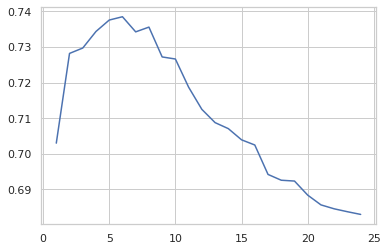

In [ ]:
sns.lineplot(x=np.arange(1,25,1), y=model.cv_results_['mean_test_score'])

In [ ]:
model.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

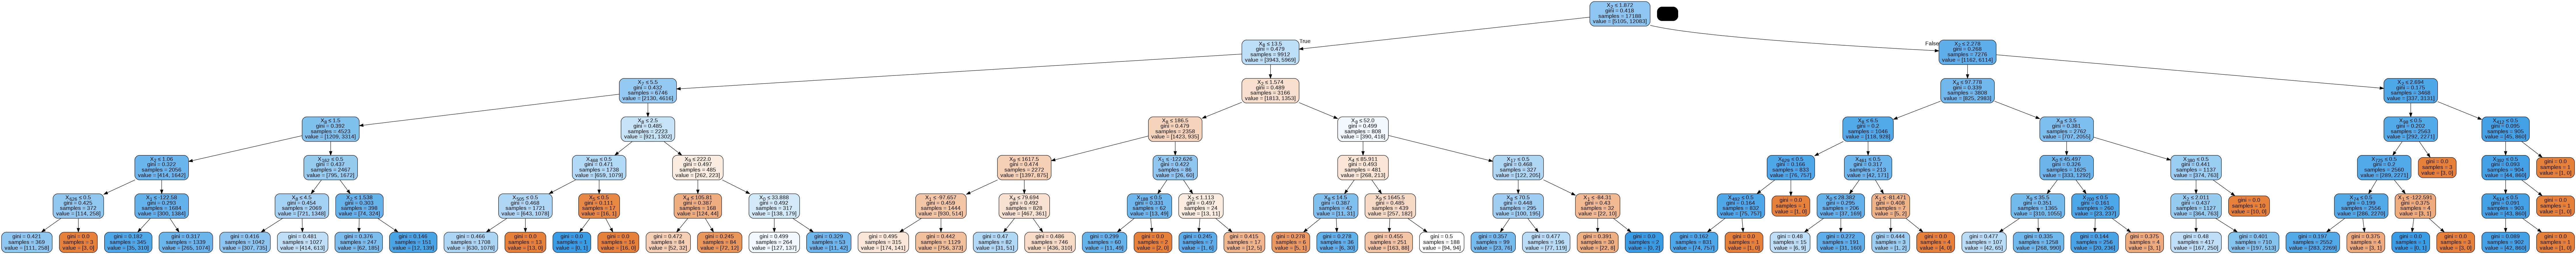

In [ ]:
dot_data = StringIO()

export_graphviz(model.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('/content/drive/My Drive/converted_data/decision_tree_graph.png')
Image(graph.create_png())

## Lasso Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(penalty='l1', dual=False, solver='liblinear', random_state=0)

In [ ]:
import scipy.stats as st

In [ ]:
params_dist = {"max_iter": st.randint(100,300), "C": st.uniform(1.1, 3.0)}
params_grid = {"max_iter": [200, 210, 220], "C": [1.2, 1.3, 1.4, 1.5, 1.6, 1.7]}

In [ ]:
%%time 
model = trainModelRandom(logreg, params_dist, X_train, y_train)

CPU times: user 718 ms, sys: 21.2 ms, total: 739 ms
Wall time: 8.11 s


In [ ]:
model.best_score_

0.7196299111591122

In [ ]:
model.best_estimator_

LogisticRegression(C=4.051910619312336, max_iter=154, penalty='l1',
                   random_state=0, solver='liblinear')

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_cv, cvPredicted)

0.7182197226801125

## Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC(dual=False, random_state=0)

In [ ]:
params = {"C": [1.2, 1.3, 1.4, 1.5, 1.6, 1.7]}

In [ ]:
params_dist = {"C": st.uniform(1.0, 2.0)}

In [ ]:
%%time
model = trainModelRandom(svc, params_dist, X_train, y_train)

CPU times: user 534 ms, sys: 215 ms, total: 750 ms
Wall time: 6.87 s


In [ ]:
model.best_score_

0.7198048374438049

In [ ]:
model.best_estimator_

LinearSVC(C=1.0520930115260798, dual=False, random_state=0)

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [ ]:
accuracy_score(y_cv, cvPredicted)

0.7179288276932028

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
params_dist = { "n_estimators": st.randint(3, 40), "max_depth": st.randint(3, 40)}

In [ ]:
%%time
model = trainModelRandom(rf, params_dist, X_train, y_train)

CPU times: user 2.76 s, sys: 42.2 ms, total: 2.8 s
Wall time: 19.9 s


In [ ]:
model.best_score_

0.7330690228484025

In [ ]:
model.best_estimator_

RandomForestClassifier(max_depth=29, n_estimators=30, random_state=0)

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [ ]:
accuracy_score(y_cv, cvPredicted)

0.7333462619994182

In [ ]:
accuracy_score(y_cv, cvPredicted)

0.7333462619994182

## Gradient Boosted Trees

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=0)

In [ ]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params_dist = {  "n_estimators": st.randint(3, 40), "max_depth": st.randint(3, 40), "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left, "subsample": one_to_left, "gamma": st.uniform(0, 10), 'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,}

In [ ]:
%%time
model = trainModelRandom(xgb, params_dist, X_train, y_train, cv=20, n_iter=50)

CPU times: user 13.9 s, sys: 1.3 s, total: 15.2 s
Wall time: 11min 33s


In [ ]:
model.best_score_

0.7493608712131468

In [ ]:
model.best_estimator_

XGBClassifier(colsample_bytree=0.9926510409569569, gamma=7.784590615133973,
              learning_rate=0.35185975587235946, max_depth=35,
              min_child_weight=44.264168556737516, n_estimators=36,
              reg_alpha=1.4903015976585607, subsample=0.9904470865655475)

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)